# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the csmera of a self-driving car recognizing the car in front.

## Get the Data

The images we're working are from Food101 dataset

we have here only two classes from it.

>**Note:** we start with small data set so we can experiment fast.


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-05-26 19:17:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:828::201b, 2a00:1450:4001:808::201b, 2a00:1450:4001:802::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:828::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104,47M  33,1MB/s    in 3,3s    

2024-05-26 19:17:28 (31,6 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [19]:
import os

# list number of files in train

for dirpath,dirname, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirname)} directories and {len(filenames)} image in {dirpath}.")

there are 2 directories and 1 image in pizza_steak.
there are 2 directories and 0 image in pizza_steak/test.
there are 0 directories and 250 image in pizza_steak/test/steak.
there are 0 directories and 250 image in pizza_steak/test/pizza.
there are 2 directories and 1 image in pizza_steak/train.
there are 0 directories and 750 image in pizza_steak/train/steak.
there are 0 directories and 750 image in pizza_steak/train/pizza.


To visualize our images, let's get the class names programmatically.

In [119]:
# get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names_unfiltered = np.array(sorted([item.name for item in data_dir.glob('*')])) # .glob('*') will return an iterable containing all files and directories
# [1:] slice from second element until end
unwanted = ['.DS_Store']
class_names = np.array([name for name in class_names_unfiltered if name not in unwanted])
print(class_names)

['pizza' 'steak']


In [113]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory 
  target_folder = target_dir + target_class
  
  # get a random image from the target directory
  random_image = random.sample(os.listdir(target_folder), 1) # pick random sample from population
  
  # read in the image and plot it
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape: {img.shape}')
  
  return img

Image shape: (512, 512, 3)


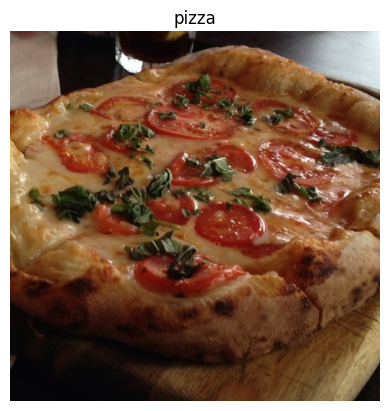

In [114]:
img = view_random_image('pizza_steak/train/','pizza')

In [115]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 96,  62,  50],
        [ 94,  60,  48],
        [ 92,  58,  46],
        ...,
        [227, 241, 244],
        [226, 240, 243],
        [222, 236, 239]],

       [[ 99,  67,  54],
        [ 97,  65,  52],
        [ 93,  61,  48],
        ...,
        [231, 245, 248],
        [231, 245, 248],
        [229, 243, 246]],

       [[104,  74,  63],
        [101,  71,  60],
        [ 96,  66,  55],
        ...,
        [233, 247, 250],
        [236, 250, 253],
        [235, 249, 252]],

       ...,

       [[  7,   7,   9],
        [  7,   7,   9],
        [  6,   6,   8],
        ...,
        [ 22,  16,  16],
        [ 27,  21,  21],
        [ 30,  24,  24]],

       [[  7,   7,   9],
        [  7,   7,   9],
        [  7,   7,   9],
        ...,
        [ 20,  14,  14],
        [ 24,  18,  18],
        [ 31,  25,  25]],

       [[  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10],
        ...,
        [ 15,   9,   

In [116]:
# View the image shape
img.shape

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by diving the image arrays by 255.(since 255 is the maximum pixel value).

In [9]:
# get all the pixel values between 0 and 1
img/255.

array([[[0.6745098 , 0.25098039, 0.34509804],
        [0.66666667, 0.25098039, 0.34117647],
        [0.68235294, 0.29411765, 0.37647059],
        ...,
        [0.23921569, 0.25098039, 0.31764706],
        [0.25490196, 0.25882353, 0.32941176],
        [0.24313725, 0.24705882, 0.31764706]],

       [[0.69411765, 0.2627451 , 0.36078431],
        [0.66666667, 0.25098039, 0.34117647],
        [0.6627451 , 0.2627451 , 0.34901961],
        ...,
        [0.12941176, 0.14117647, 0.20784314],
        [0.1254902 , 0.12941176, 0.2       ],
        [0.17254902, 0.17647059, 0.24705882]],

       [[0.67058824, 0.23137255, 0.3254902 ],
        [0.65098039, 0.22352941, 0.31372549],
        [0.64705882, 0.23137255, 0.31764706],
        ...,
        [0.16470588, 0.18823529, 0.24313725],
        [0.15686275, 0.16862745, 0.22745098],
        [0.21176471, 0.22352941, 0.28235294]],

       ...,

       [[0.63529412, 0.63529412, 0.60392157],
        [0.61960784, 0.61960784, 0.58823529],
        [0.61176471, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our pizza and steak images.

To do, we'll use:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [117]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32,   target_size = (224, 224), class_mode = 'binary', seed = 42)

valid_data = train_datagen.flow_from_directory(directory = test_dir , batch_size = 32,           target_size = (224, 224), class_mode = 'binary', seed = 42) 

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model

model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the model

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.6200 - loss: 0.6484 - val_accuracy: 0.8320 - val_loss: 0.4420
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2024-06-02 16:43:41.731254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-06-02 16:43:41.731276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-02 16:43:41.731295: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6225868331417067908
2024-06-02 16:43:41.731304: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11210369140763648091
2024-06-02 16:43:41.731314: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13989588450609713912
2024-06-02 16:43:41.731327: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6490108887555462050
2024-06-0

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8117 - loss: 0.4375 - val_accuracy: 0.8520 - val_loss: 0.3688
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2024-06-02 16:43:47.118597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-02 16:43:47.118616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_8/_44]]
2024-06-02 16:43:47.118624: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11210369140763648091
2024-06-02 16:43:47.118628: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10822881520302946437
2024-06-02 16:43:47.118641: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8886135677553351365
2024-06-02 16:43:47.118647: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 119616749

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8347 - loss: 0.3779 - val_accuracy: 0.8620 - val_loss: 0.3371


In [11]:
len(train_data)

47

In [12]:
1500/32 # 32 is batch size to fit in memory

46.875

In [13]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

**Note:** CNN explainer web site

## Using the same model as before

Let's replicate the model we built in a previous section to see if works with our image data.

the model we're building is from the Tensorflow playground:

In [14]:
# set random seed
tf.random.set_seed(42)

# create the model to replicate the TensorFlow Playground model

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model

model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# fit the model

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4931 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2024-05-26 19:17:50.710950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-26 19:17:50.710971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-26 19:17:50.710980: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6042356952557118466
2024-05-26 19:17:50.710985: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10645714403318944789
2024-05-26 19:17:50.710993: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11550065364845741795
2024-05-26 19:17:50.710998: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14395619617723959339
2024-05-

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5262 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2024-05-26 19:17:54.506837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-26 19:17:54.506859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/binary_crossentropy/mod/_35]]
2024-05-26 19:17:54.506873: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6042356952557118466
2024-05-26 19:17:54.506892: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9147596469715186375
2024-05-26 19:17:54.506903: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12177075410184377604
2024-05-26 19:17:54.506906: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous r

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4787 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [15]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN model, the model_2 performed terribly

In [16]:
# set random seed
tf.random.set_seed(42)

# create the model to replicate the TensorFlow Playground model

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model

model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# fit the model

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6183 - loss: 3.6858 - val_accuracy: 0.6580 - val_loss: 1.3856
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2024-05-26 19:18:03.511024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-26 19:18:03.511043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_6/_28]]
2024-05-26 19:18:03.511061: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6042356952557118466
2024-05-26 19:18:03.511079: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14395619617723959339
2024-05-26 19:18:03.511088: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12177075410184377604
2024-05-26 19:18:03.511099: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 939239528

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7216 - loss: 1.0657 - val_accuracy: 0.7100 - val_loss: 1.1073
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2024-05-26 19:18:07.360346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-26 19:18:07.360370: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6042356952557118466
2024-05-26 19:18:07.360376: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12177075410184377604
2024-05-26 19:18:07.360384: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9392395282722793020
2024-05-26 19:18:07.360390: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14321856060466292874
2024-05-26 19:18:07.360396: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11500465366200227888
2024-05-26 19:18:07.360400: I tensorflow/core/framework/local_rendez

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7302 - loss: 0.8276 - val_accuracy: 0.7240 - val_loss: 0.8738


In [17]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │     6,021,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,068,525 (68.93 MB)

 Trainable params: 6,022,841 (22.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,045,684 (45.95 MB)

In [18]:
18068525/31101 

580.9628307771454

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intutively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image. 

## Binary Classification: Let's break it Down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat your baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


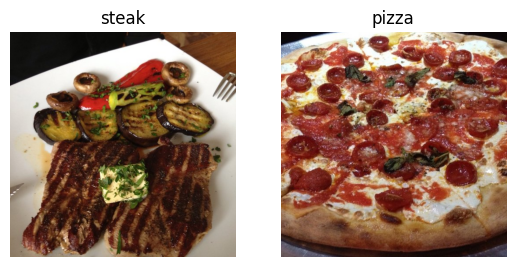

In [28]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### 2. Preprocess the data(prepare it for a model)

In [29]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your proccessor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [53]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load in our image data from directories and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             seed= 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
# Get a sample of a train data batch
#images, labels = train_data.next() # Get the 'next'  batch of images/labels
#len(images),len(labels)
len(test_data)
len(train_data)

94

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 

**Note:** In deep learning, there is almost an infinite ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which curtrent model is performing best in the field for your problem).

paperswithcode.com

In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         activation='relu', 
         input_shape=(224, 224, 3), 
         padding='same', #if "same", output shape is same as input shape, if "valid", output shape gets compressed
         strides=1),# input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')# output layer (working with binary classification so only one output neuron)
])

# Compile the model

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data, epochs=5, validation_data=test_data)

model_4.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.5001 - loss: 1.1124 - val_accuracy: 0.7600 - val_loss: 0.5503
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.7717 - loss: 0.5102 - val_accuracy: 0.7460 - val_loss: 0.5704
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8070 - loss: 0.4702 - val_accuracy: 0.8340 - val_loss: 0.3690
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9113 - loss: 0.2773 - val_accuracy: 0.8080 - val_loss: 0.4215
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9573 - loss: 0.1498 - val_accuracy: 0.8160 - val_loss: 0.4464


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 222, 222, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 484000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │       484,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,458,305 (5.56 MB)

 Trainable params: 486,101 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 972,204 (3.71 MB)

### 5.Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

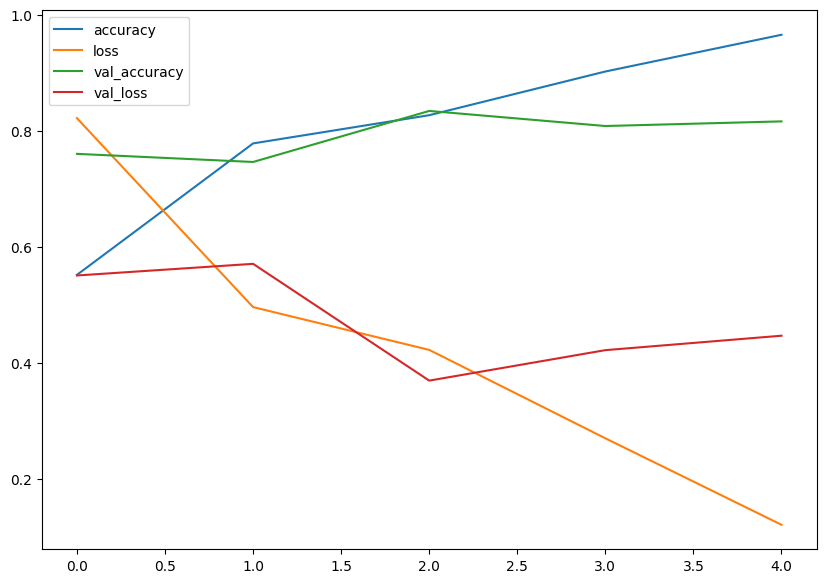

In [55]:
#lets plot the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [56]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

**Note:** When a model"s **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.This  means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

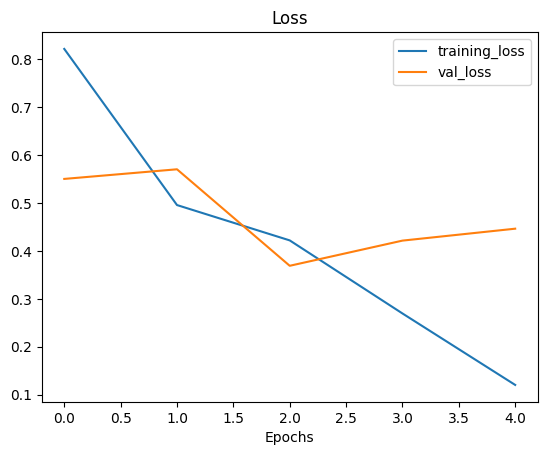

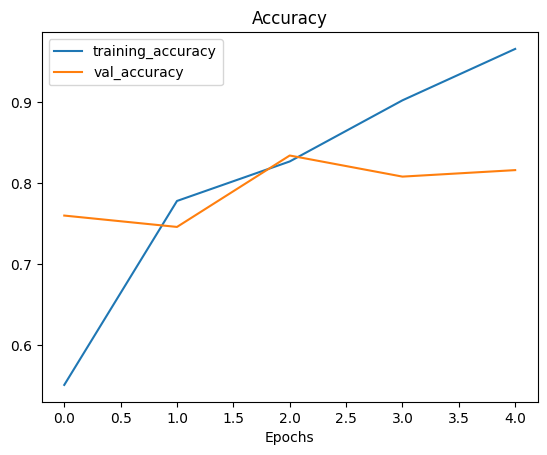

In [57]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**.

In [58]:
# Create the model (this is going to be our new baseline)


model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model

history_5 = model_5.fit(train_data, epochs=5,  validation_data=valid_data)

model_5.summary()

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.5095 - loss: 0.7138 - val_accuracy: 0.6660 - val_loss: 0.6330
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6805 - loss: 0.6092 - val_accuracy: 0.7460 - val_loss: 0.5068
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7742 - loss: 0.4793 - val_accuracy: 0.8400 - val_loss: 0.3729
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8194 - loss: 0.4119 - val_accuracy: 0.8500 - val_loss: 0.3883
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8364 - loss: 0.3811 - val_accuracy: 0.8500 - val_loss: 0.3355


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [59]:
model_4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 222, 222, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 484000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │       484,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,458,305 (5.56 MB)

 Trainable params: 486,101 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 972,204 (3.71 MB)

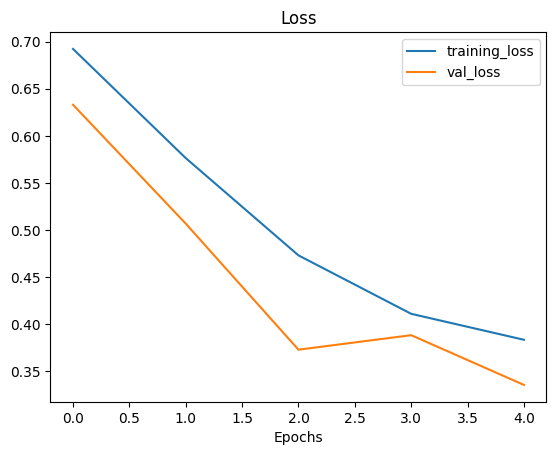

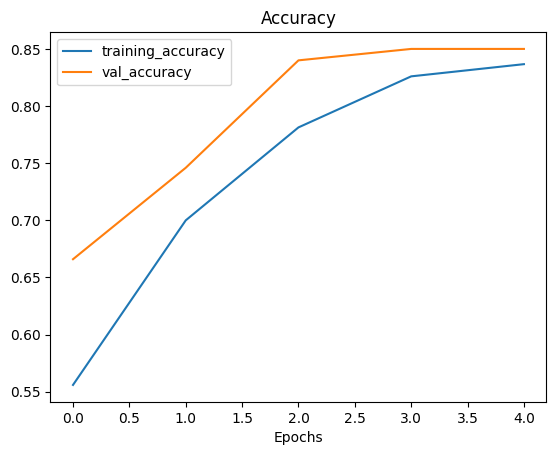

In [60]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [64]:
# Create ImageDataGenerator training instance with data augmentation 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)



**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualizer data augmentation...

In [65]:
# Import data and augment it from training directory


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # For ndemonstration purposes only
# Create non-augmented train data batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally.. let's visualize some augmented data!!!

In [66]:
#images, labels = train_data.next()

now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.6037 - loss: 0.7116 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.5089 - loss: 0.6959 - val_accuracy: 0.6040 - val_loss: 0.6479
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.5931 - loss: 0.7153 - val_accuracy: 0.5280 - val_loss: 0.6308
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.5036 - loss: 0.6874 - val_accuracy: 0.7340 - val_loss: 0.5221
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.6112 - loss: 0.6621 - val_accuracy: 0.7380 - val_loss: 0.5551


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

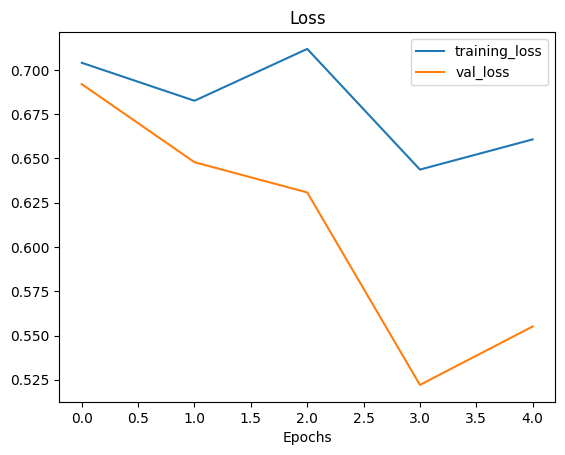

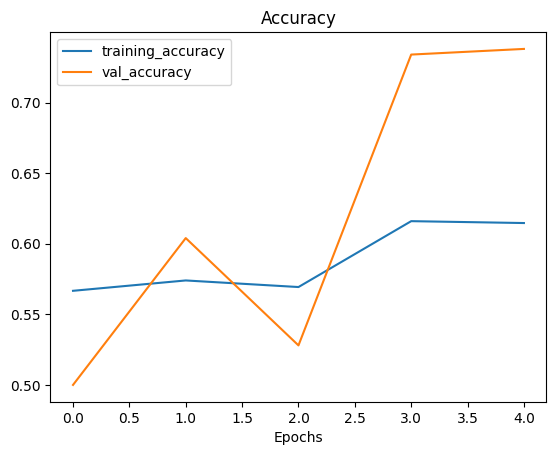

In [68]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, epochs=5, validation_data=test_data)

model_6.summary()
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [69]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='binary',shuffle=True)



Found 1500 images belonging to 2 classes.


In [70]:
# Create the model
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, validation_data=test_data)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.5426 - loss: 0.6749 - val_accuracy: 0.7680 - val_loss: 0.5155
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.6971 - loss: 0.5724 - val_accuracy: 0.6860 - val_loss: 0.5669
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.7323 - loss: 0.5271 - val_accuracy: 0.8460 - val_loss: 0.3691
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.7874 - loss: 0.4862 - val_accuracy: 0.8600 - val_loss: 0.3463
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.7891 - loss: 0.4551 - val_accuracy: 0.8400 - val_loss: 0.3798


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

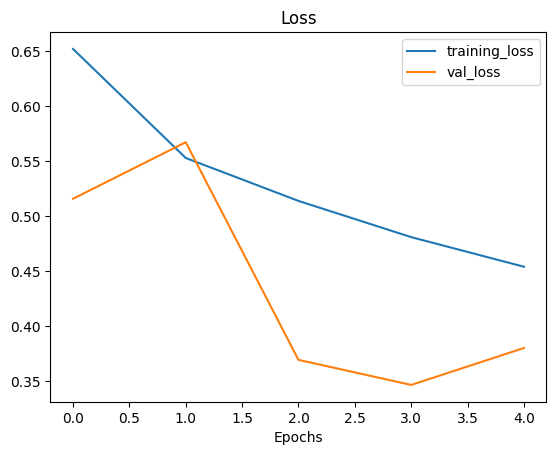

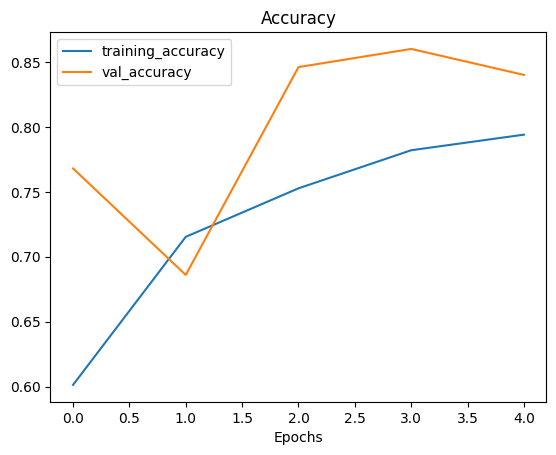

In [122]:
model_7.summary()
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training,thus enabling it to learn features across a wide array of images (in our case,pizza & steak at the sdame time instead of just pizza then steak).

### 7.Repeat until satisfied

Since we've already neaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers)
* Increase the number of filters in each convolutional layer(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find ideal learning rate
* Get more data (give the model more opportunities to learn)
* use **transfer learning** to leverage what another image model has learn and adjust it for our own use case


> go to cnn explainer and build model for it


### Making a prediction with our trained model on our own custom data


In [121]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


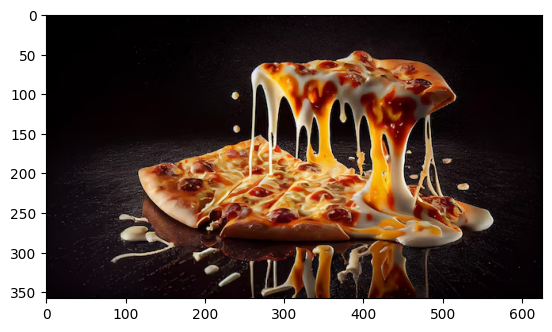

In [74]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
pizza = mpimg.imread('pizza-test.jpeg')
plt.imshow(pizza)

In [76]:
# Check the shape
model_7.predict(pizza)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_20_1/Cast:0", shape=(32, 626, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 626, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 626, 3), dtype=uint8)
  • training=False
  • mask=None

> **Note** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data is preprocessed into the same format as the data your model was trained on.

In [91]:
# Create a function to import an image and resize it to be able to make prediction on it
def preprocess_image(image_path):
    image = tf.io.read_file(image_path) # io is for input output
    image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels as needed
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return tf.expand_dims(image,axis=0)

In [92]:
preprocess_pizza= preprocess_image("pizza-test.jpeg")
preprocess_pizza

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.02352941, 0.00392157, 

In [93]:
prediction = model_7.predict(preprocess_pizza)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.57146484]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [94]:
# We can index the predict class by rounding the prediction
def prediction_class(prediction):
    index = round(prediction[0,0])
    return class_names[index]


In [95]:
prediction_class(prediction)

'pizza'

In [125]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makeks a prediction with model
  and plots the image with the predicted class as the title.
  """
  image = tf.io.read_file(filename) # io is for input output
  image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels as needed
  image = tf.image.resize(image, [224, 224])
  image = image / 255.0
  image = tf.expand_dims(image,axis=0)
  
  pred = model.predict(image)
  index = round(pred[0,0])
  title = class_names[index]
  
  
  pizza = mpimg.imread(filename)
  plt.title(title)
  plt.axis(False)
  plt.imshow(pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


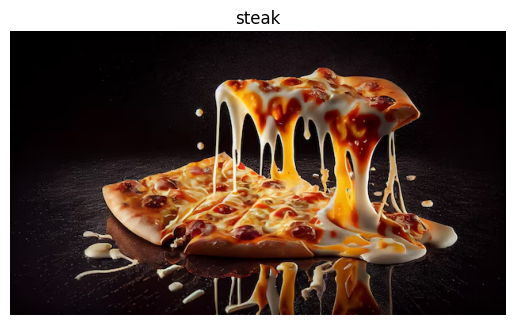

In [126]:
pred_and_plot(model_7, 'pizza-test.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


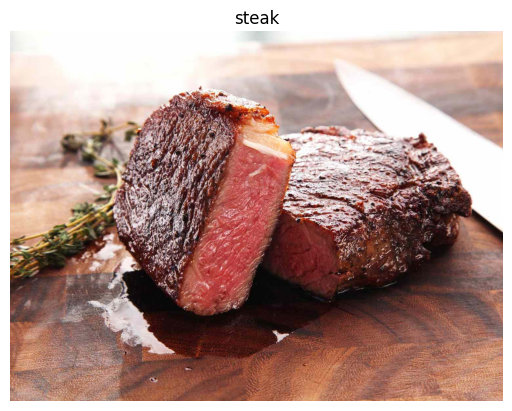

In [127]:
pred_and_plot(model_7, 'steak.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


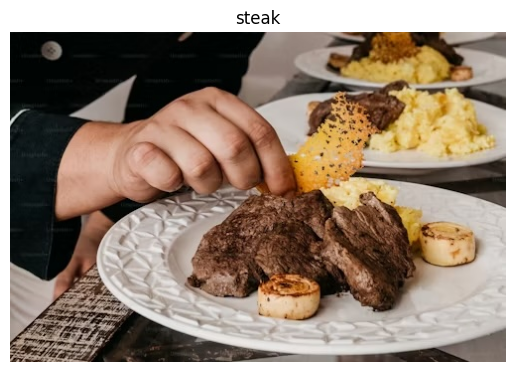

In [128]:
pred_and_plot(model_7, 'steak2.jpeg')

In [107]:
preprocess_pizza= preprocess_image("pizza2.jpeg")
model_7.predict(preprocess_pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.41257474]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


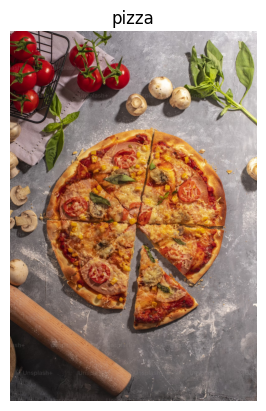

In [129]:
pred_and_plot(model_7, 'pizza2.jpeg')

# Multi-class Image Classification

we've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat your previous results/ reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [130]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-02 17:58:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:82f::201b, 2a00:1450:4001:827::201b, 2a00:1450:4001:828::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:82f::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495,13M  29,6MB/s    in 18s     

2024-06-02 17:58:54 (26,8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [131]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [132]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [133]:
# Let's get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


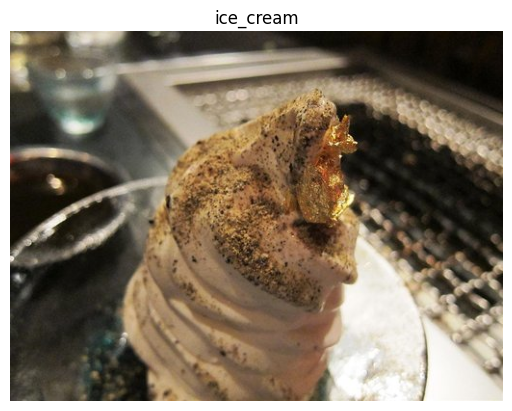

In [147]:
# Visualize, visualize, visualize
import random
img = view_random_image(train_dir,target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for model)

# Steps in modeling

1. Turn all data into numbers
2. Make share all of your tensors are the right shape
3. Scale features(normalize or standardize, neural networks tend to prefer normalization)

In [148]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)

# Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories

train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32,   target_size = (224, 224), class_mode = 'categorical', seed = 42)

valid_data = train_datagen.flow_from_directory(directory = test_dir , batch_size = 32,           target_size = (224, 224), class_mode = 'categorical', seed = 42) 

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3.Create a model

we've been talking a lot about the CNN explainer ... How about we just take their model (also on 10 classes ) and use it for our problem ...?

In [149]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # change to have 10 output neurons and use the softmax
])


# Compile the model
model_8.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])# loss for multiclass is categorical_crossentropy

# Fit the model
history_8 = model_8.fit(train_data, epochs=5, validation_data=valid_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 110ms/step - accuracy: 0.1511 - loss: 2.2490 - val_accuracy: 0.1848 - val_loss: 2.1610
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.2697 - loss: 2.0438 - val_accuracy: 0.2680 - val_loss: 2.0615
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 103ms/step - accuracy: 0.4290 - loss: 1.6511 - val_accuracy: 0.2788 - val_loss: 2.0996
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.6606 - loss: 1.0324 - val_accuracy: 0.2708 - val_loss: 2.7012
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.8963 - loss: 0.3503 - val_accuracy: 0.2572 - val_loss: 4.3271


### 5.Evaluate the model

In [151]:
model_8.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.2485 - loss: 4.4582


[4.296274662017822, 0.2572000026702881]

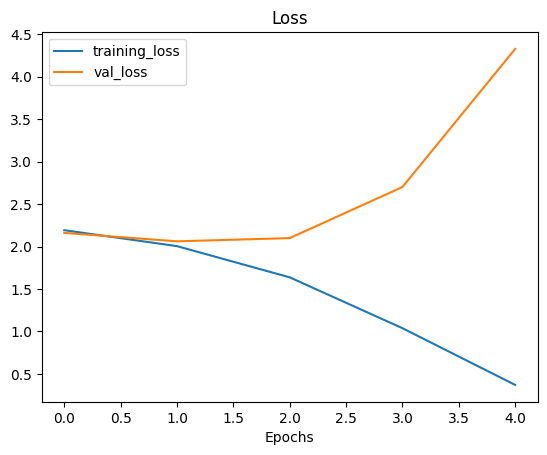

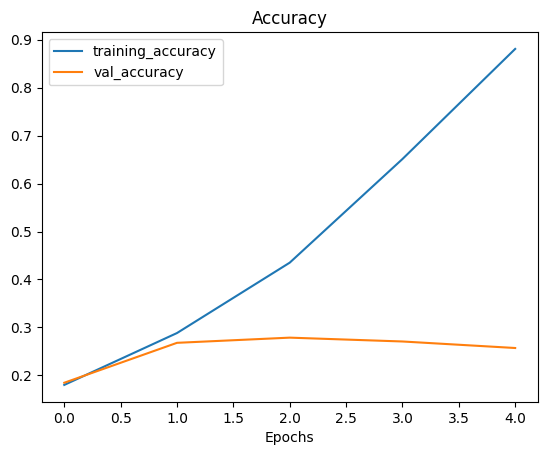

In [152]:
# check out the model's loss curves
plot_loss_curves(history_8)

waht do thewse loss curves tell us?

well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to feneralize well to unseen data and performs poorly on the test dataset.

### Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However,it's not generalizing well to unseen data (overfitting).

So, let;s try and fix overfitting by...

*  **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpligy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [153]:
# how about we try and simlify our model first
# let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # change to have 10 output neurons and use the softmax
])

# Compile the model
model_9.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])# loss for multiclass is categorical_crossentropy

# Fit the model
history_9 = model_9.fit(train_data, epochs=5, validation_data=valid_data)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.1248 - loss: 2.7920 - val_accuracy: 0.2128 - val_loss: 2.1486
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.2718 - loss: 2.0383 - val_accuracy: 0.2784 - val_loss: 2.0287
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.3994 - loss: 1.7765 - val_accuracy: 0.2620 - val_loss: 2.0560
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.5207 - loss: 1.4613 - val_accuracy: 0.2664 - val_loss: 2.1663
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.6735 - loss: 1.0332 - val_accuracy: 0.2444 - val_loss: 2.4203


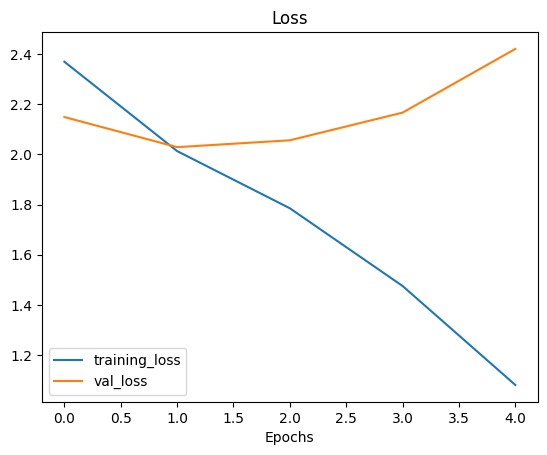

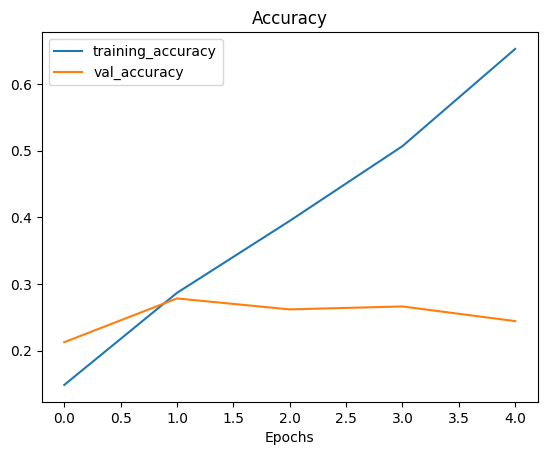

In [154]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)



In [156]:
model_9.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

### Trying to reduce overfitting with data augmentation

In [158]:
# Create ImageDataGenerator training instance with data augmentation 
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [159]:
# Import data and augment it from training directory


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical') # For ndemonstration purposes only


Found 7500 images belonging to 10 classes.


In [162]:
# let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10= tf.keras.models.clone_model(model_8)

# compile the cloned model
model_10.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the cloned model
history_10 = model_10.fit(train_data_augmented, epochs=10, validation_data=valid_data)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.1056 - loss: 2.3100 - val_accuracy: 0.1304 - val_loss: 2.2734
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 226ms/step - accuracy: 0.1625 - loss: 2.2381 - val_accuracy: 0.2088 - val_loss: 2.1551
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.1884 - loss: 2.2005 - val_accuracy: 0.2632 - val_loss: 2.0625
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.2227 - loss: 2.1345 - val_accuracy: 0.2644 - val_loss: 2.0850
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 225ms/step - accuracy: 0.2321 - loss: 2.1064 - val_accuracy: 0.2808 - val_loss: 2.0103
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 230ms/step - accuracy: 0.2571 - loss: 2.0615 - val_accuracy: 0.3244 - val_loss: 1.9093
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.2910 - loss: 2.0154 - val_accuracy: 0.3508 - val_loss: 1.8380
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 232ms/step - accuracy: 0.3140 - loss: 1

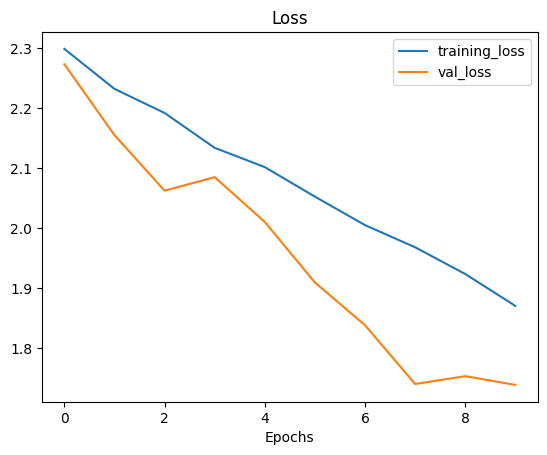

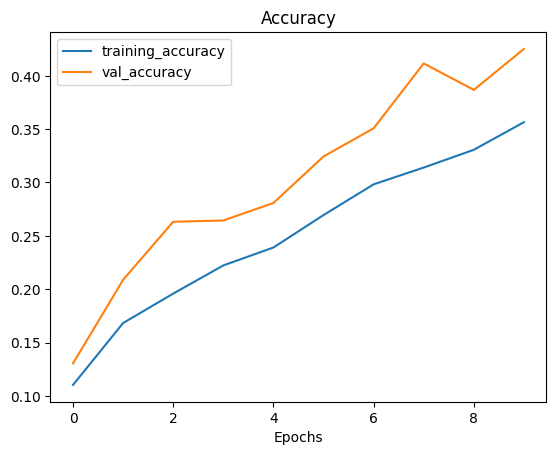

In [165]:
plot_loss_curves(history_10)

woah! That looks much better , the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7.Repeat untill satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring out model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust th hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **Transfer learning**


### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [163]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [175]:
# Reconfig pred_and_plot function for multiclass
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makeks a prediction with model
  and plots the image with the predicted class as the title.
  """
  image = tf.io.read_file(filename) # io is for input output
  image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels as needed
  image = tf.image.resize(image, [224, 224])
  image = image / 255.0
  image = tf.expand_dims(image,axis=0)
  
  pred = model.predict(image)
  
  if len(pred[0]) > 1:
    print(tf.argmax(pred[0]))
    title = class_names[int(tf.argmax(pred[0]))] # it's give number related to location of our goal class(max number)
  else:
    title = class_names[round(pred[0])]
  
  
  pizza = mpimg.imread(filename)
  plt.title(title)
  plt.axis(False)
  plt.imshow(pizza)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tf.Tensor(8, shape=(), dtype=int64)


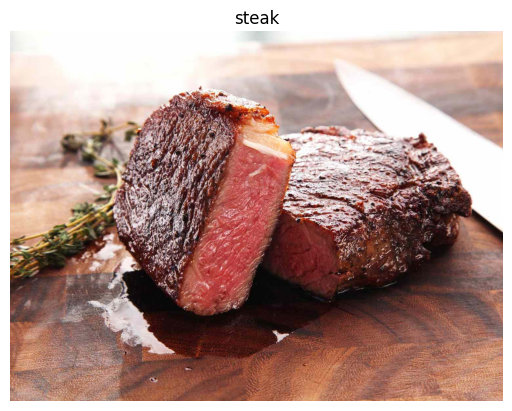

In [176]:
pred_and_plot(model_10,'steak.jpg',class_names)

### saving and loading our model

In [179]:
model_10.save('saved_model.keras')

In [180]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_model.keras')
loaded_model_10.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.4392 - loss: 1.7284


[1.7271156311035156, 0.4251999855041504]

In [181]:
# compare our saved model and loaded
model_10.evaluate(valid_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4216 - loss: 1.7194


[1.7320640087127686, 0.4251999855041504]